### How to balance unbalance data
1. Under sampling majority class 
   - take randomly pick 1000 green from 99000 and combine with red sample and train the model
2. Oversampling minority class by duplication
   - you duplicate 1000 red  by 99 times and trainthe model
3. Over sampling minority class using SMOTE
   - 1. Generate synthetic examples using k nearest neighbour algorithm means it create synthetic sample from minority class
   - 2.SMOTE- synthetic minority over sampling technique
4. Ensemble Method
   - if you have 3000 in green sample and 1000 red sample then 
   - take first betch of 1000 green combine with 1000 red sample
   - take second betch of 1000 green and combine with 1000 red sample
   - take third betch of 1000 green and combine with 1000 red sample
    - and after that take  majority of 03 batches
5. Focal Loss
   - Focal loss will penalize majprity samples during loss calculation and give more weight to minority class sample
6. Imbalnce dataset are customer,churn rate device failure,cancer prediction

In [1]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix,classification_report


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('customer_churn.csv')
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5147,7622-NXQZR,Male,0,No,No,28,No,No phone service,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),30.10,810.85,No
5957,6877-LGWXO,Male,1,Yes,No,18,Yes,No,Fiber optic,No,...,No,No,No,Yes,Month-to-month,No,Electronic check,78.55,1422.65,Yes
2687,5213-TWWJU,Male,0,No,No,28,Yes,No,Fiber optic,No,...,Yes,Yes,No,Yes,Month-to-month,No,Electronic check,91.00,2626.15,No
6550,1309-BXVOQ,Male,0,Yes,No,21,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,106.10,2249.95,Yes
2525,3133-PZNSR,Male,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,No,Yes,No,Yes,Two year,Yes,Credit card (automatic),97.75,6991.6,No


In [4]:
#we don't need customerId so, we will drop this column
df.drop('customerID',axis='columns',inplace=True)
#it will show all the columns with the dtype
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
#here we can see that total charges are object 
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [6]:
#so we will see the row that are  having spaces
pd.to_numeric(df.TotalCharges,errors='coerce')
#so it above line will change totalcharges to numeric and wherever space will there it will just print no

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [7]:
#it will showing the data that totalcharges column will null
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [8]:
#so there are 20 columns in which Totalchargges are null
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()].shape

(11, 20)

In [9]:
df.iloc[488]['TotalCharges']

' '

In [10]:
#so, we will drop the this 11 rows
df1=df[df.TotalCharges != ' ']
df1.shape

(7032, 20)

In [11]:
df1.TotalCharges=pd.to_numeric(df1.TotalCharges)

In [12]:
df1.dtypes
#now you can see in output that TotalCharges are in float64

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

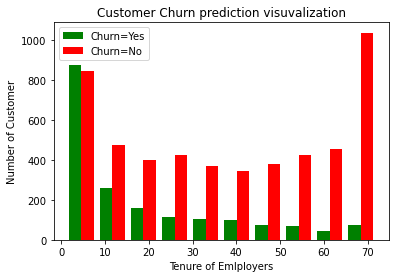

In [13]:
#now we are doing visuvalization for seeing that how many of loyal customer are leaving
tenure_churn_no=df1[df1.Churn=='No'].tenure
tenure_churn_yes=df1[df1.Churn=='Yes'].tenure

plt.hist([tenure_churn_yes,tenure_churn_no],color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.xlabel('Tenure of Emlployers')
plt.ylabel("Number of Customer")
plt.title("Customer Churn prediction visuvalization")
plt.legend()


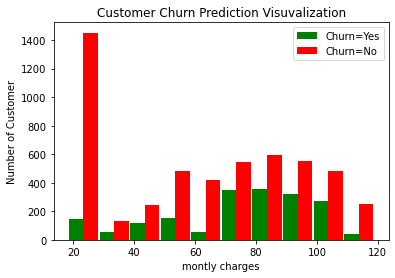

In [14]:
#now we are doing visuvalization of churn vs mothlycharges
mc_churn_no=df1[df1.Churn=='No'].MonthlyCharges
mc_churn_yes=df1[df1.Churn=='Yes'].MonthlyCharges

plt.xlabel('montly charges')
plt.ylabel('Number of Customer')
plt.title("Customer Churn Prediction Visuvalization")

plt.hist([mc_churn_yes,mc_churn_no],rwidth=0.95,color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [15]:
#now  we are seeing the unique value so, we can use label encoding
for column in df:
    print(f'{column} : {df[column].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2

In [16]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtype == 'object':#we need column that is categorical for the labelencoding
            print(f'{column} : {df[column].unique()}')

In [17]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [18]:
#so, we can see that in column like OnlineBackup where NO internet service so, it is like no only
df1.replace("No internet service","No",inplace=True)
df1.replace("No phone service","No",inplace=True)

In [19]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [20]:
yes_no_columns=['Partner','Dependents','PhoneService','MultipleLines','OnlineBackup','OnlineSecurity',
               'DeviceProtection','TechSupport','StreamingMovies','PaperlessBilling','Churn','StreamingTV'
               ]
for col in yes_no_columns:
    df1[col].replace({'Yes':1,'No':0},inplace=True)

In [21]:
for col in df1:
    print(f'{col}:{df1[col].unique()}')

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [22]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

In [23]:
df2=pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])


In [24]:
df2.sample(5)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5397,0,0,0,0,6,1,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
4481,0,0,1,0,42,0,0,1,0,0,...,1,0,0,1,0,0,1,0,0,0
5554,1,0,0,0,63,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
3539,0,0,0,0,8,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
2177,0,1,1,0,72,1,1,1,1,1,...,0,1,0,0,0,1,0,1,0,0


In [25]:
 df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [26]:
#now we are scaling the data
cols_to_scale=['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df2[cols_to_scale]=scaler.fit_transform(df2[cols_to_scale])
    

In [27]:
X=df2.drop('Churn',axis='columns')
y=df2['Churn']

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [29]:
X_train.shape


(5625, 26)

In [30]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [31]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.5339 - accuracy: 0.7301
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4369 - accuracy: 0.7883
Epoch 3/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4239 - accuracy: 0.7941
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4181 - accuracy: 0.8021
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4146 - accuracy: 0.8043
Epoch 6/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4122 - accuracy: 0.8096
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4114 - accuracy: 0.8066
Epoch 8/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4085 - accuracy: 0.8105
Epoch 9/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4079 - accuracy: 0.8116
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4057 - accura

176/176 [==============================] - 0s 2ms/step - loss: 0.3505 - accuracy: 0.8357
Epoch 82/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3499 - accuracy: 0.8352
Epoch 83/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3496 - accuracy: 0.8384
Epoch 84/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3503 - accuracy: 0.8343
Epoch 85/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3483 - accuracy: 0.8388
Epoch 86/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3487 - accuracy: 0.8380
Epoch 87/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3495 - accuracy: 0.8363
Epoch 88/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3471 - accuracy: 0.8393
Epoch 89/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3472 - accuracy: 0.8382
Epoch 90/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3460 - accuracy: 

In [32]:
# Class count
count_class_0,count_class_1=df.Churn.value_counts()

count_class_0,count_class_1

(5174, 1869)

In [33]:
df_class_0=df2[df2['Churn']==0]
df_class_1=df2[df2['Churn']==1]

In [34]:
df_class_0.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2396,1,1,1,0,0.521127,1,1,1,1,0,...,0,1,0,0,1,0,0,1,0,0
6525,0,0,1,1,0.760563,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
6664,1,0,0,0,0.492958,1,1,0,1,1,...,0,1,0,0,1,0,1,0,0,0
1841,1,0,1,0,0.774648,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
5926,0,0,0,0,0.070423,1,0,1,0,1,...,1,0,0,1,0,0,0,1,0,0


In [35]:
df_class_0.shape

(5163, 27)

In [36]:
df_class_1.shape

(1869, 27)

### Under Sampling

In [37]:
#now we are using under sampling method
# we are taking df_class_0's 1896 sample that is equal to class 1 sample
df_class_0_under=df_class_0.sample(count_class_1)

df_test_under=pd.concat([df_class_0_under,df_class_1],axis=0)

print("Random Under Sampling:")
print(df_test_under.Churn.value_counts())

Random Under Sampling:
0    1869
1    1869
Name: Churn, dtype: int64


In [38]:
X=df_test_under.drop('Churn',axis='columns')
y=df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=15,stratify=y)
#stratify = y will help you to ensure that data is balanced

In [39]:
y_preds=ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6723 - accuracy: 0.5679
Epoch 2/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5869 - accuracy: 0.7321
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5283 - accuracy: 0.7582
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5063 - accuracy: 0.7562
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4940 - accuracy: 0.7622
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4895 - accuracy: 0.7625
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4843 - accuracy: 0.7662
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4810 - accuracy: 0.7686
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4776 - accuracy: 0.7706
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4762 - accuracy: 0.7759
Epoch 11/

94/94 [==============================] - 0s 2ms/step - loss: 0.3971 - accuracy: 0.8181
Epoch 84/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3969 - accuracy: 0.8211
Epoch 85/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3946 - accuracy: 0.8231
Epoch 86/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3933 - accuracy: 0.8264
Epoch 87/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3940 - accuracy: 0.8211
Epoch 88/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3942 - accuracy: 0.8231
Epoch 89/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3919 - accuracy: 0.8291
Epoch 90/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3921 - accuracy: 0.8258
Epoch 91/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3918 - accuracy: 0.8214
Epoch 92/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3906 - accuracy: 0.8237
Epoch 93/100


### Method2: Oversamplinig

In [40]:
count_class_0,count_class_1

(5174, 1869)

In [42]:
df_class_1_over=df_class_1.sample(count_class_0,replace=True)#je class 01 me kam sample tha usko class_0 ki size se randomly genearate kari didha
df_test_over=pd.concat([df_class_0,df_class_1_over],axis=0)#concatinating the df_class_0,df_Class_1
print("we created the oversampling and you can  see the size,",df_class_1_over.shape)
print("we can see that size of class 0 is same as we oversample class",df_class_0.shape)
df_test_over.shape

we created the oversampling and you can  see the size, (5174, 27)
we can see that size of class 0 is same as we oversample class (5163, 27)


(10337, 27)

In [43]:
X=df_test_over.drop('Churn',axis='columns')
y=df_test_over['Churn']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=15,stratify=y)#,


In [44]:
y_test.value_counts()

1    1035
0    1033
Name: Churn, dtype: int64

In [45]:
y_train.value_counts()

1    4139
0    4130
Name: Churn, dtype: int64

In [46]:
y_pred=ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
259/259 [==============================] - 1s 2ms/step - loss: 0.5258 - accuracy: 0.7456
Epoch 2/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4923 - accuracy: 0.7610
Epoch 3/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4846 - accuracy: 0.7654
Epoch 4/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4804 - accuracy: 0.7654
Epoch 5/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4750 - accuracy: 0.7728
Epoch 6/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4725 - accuracy: 0.7728
Epoch 7/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4689 - accuracy: 0.7766
Epoch 8/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4670 - accuracy: 0.7789
Epoch 9/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4643 - accuracy: 0.7805
Epoch 10/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4610 - accura

259/259 [==============================] - 0s 2ms/step - loss: 0.3765 - accuracy: 0.8305
Epoch 82/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3762 - accuracy: 0.8262
Epoch 83/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3746 - accuracy: 0.8275
Epoch 84/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3752 - accuracy: 0.8278
Epoch 85/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3745 - accuracy: 0.8269
Epoch 86/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3735 - accuracy: 0.8297
Epoch 87/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3719 - accuracy: 0.8309
Epoch 88/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3713 - accuracy: 0.8298
Epoch 89/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3718 - accuracy: 0.8308
Epoch 90/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3711 - accuracy: 

### -3. Method:SMOTE

In [47]:
X=df2.drop('Churn',axis='columns')
y=df2['Churn']

In [48]:
#!pip install imbalanced-learn

In [49]:
from imblearn.over_sampling import SMOTE

smote=SMOTE(sampling_strategy='minority')
X_sm,y_sm=smote.fit_resample(X,y)

y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_sm,y_sm,test_size=0.2,random_state=15,stratify=y_sm)
#here stratify will insure that the value y_sm will be same

In [51]:
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [52]:
y_test.value_counts()

1    1033
0    1033
Name: Churn, dtype: int64

In [53]:
y_preds=ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
259/259 [==============================] - 1s 2ms/step - loss: 0.5326 - accuracy: 0.7446
Epoch 2/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4673 - accuracy: 0.7818
Epoch 3/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4574 - accuracy: 0.7840
Epoch 4/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4498 - accuracy: 0.7909
Epoch 5/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4458 - accuracy: 0.7929
Epoch 6/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4402 - accuracy: 0.7971
Epoch 7/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4362 - accuracy: 0.7989
Epoch 8/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4319 - accuracy: 0.8036
Epoch 9/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4293 - accuracy: 0.8033
Epoch 10/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4267 - accura

259/259 [==============================] - 0s 1ms/step - loss: 0.3357 - accuracy: 0.8539
Epoch 82/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3354 - accuracy: 0.8534
Epoch 83/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3345 - accuracy: 0.8557
Epoch 84/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3335 - accuracy: 0.8564
Epoch 85/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3337 - accuracy: 0.8550
Epoch 86/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3337 - accuracy: 0.8551
Epoch 87/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3300 - accuracy: 0.8597
Epoch 88/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3362 - accuracy: 0.8530
Epoch 89/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3320 - accuracy: 0.8547
Epoch 90/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3352 - accuracy: 